# <center> Exploration du Dataset </center>

### PART1 : Analayse et import des Datasets

#### 1.1 : Import

On commence par les imports de base afin de pouvoir accéder au code présent dans le dossier src/.

In [70]:
import sys
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))

import src.dataset as dataset_module
from importlib import reload

dataset_module = reload(dataset_module)

from pathlib import Path

DATA_DIR = Path("data")
print(DATA_DIR.resolve())
print((DATA_DIR / "train").exists())
print((DATA_DIR / "train_metadata.csv").exists())


C:\Users\julie\OneDrive - CentraleSupelec\cours\3A\Mention IA\Projet DL +recVi\deepl-projet\notebooks\data
False
False


On importe ensuite le dataset décomposé en trois sous-dataset train, val et test. On les regroupe aussi afin d'accéder au dataset global sans split, pour l'exploration.

In [71]:
df_test, df_train, df_val = dataset_module.load_df_train_test_val()
df = dataset_module.load_df()

df_train["split"] = "train"
df_val["split"] = "val"
df_test["split"] = "test"

df = pd.concat([df_train, df_val, df_test], ignore_index=True)


#### 1.2 : Analyse des split

On observe la composition des split afin de vérifier la bonne répartition.

In [72]:
pd.crosstab(df["style_name"], df["split"], normalize="columns")


split,test,train,val
style_name,,,
Abstract_Expressionism,0.032864,0.041834,0.040241
Action_painting,0.008048,0.011070,0.006036
Analytical_Cubism,0.008719,0.010926,0.014085
Art_Nouveau,0.036888,0.042122,0.034876
Baroque,0.040241,0.040109,0.040912
Color_Field_Painting,0.034205,0.041403,0.040912
Contemporary_Realism,0.038229,0.040253,0.042254
Cubism,0.040241,0.039822,0.042254
Early_Renaissance,0.046948,0.039965,0.034876


On vérifie la taille des splits :

In [ ]:
len(df_train), len(df_val), len(df_test), len(df_train) + len(df_val) + len(df_test)
print("pourcentage de train :", len(df_train) / len(df) * 100)
print("pourcentage de val :", len(df_val) / len(df) * 100)
print("pourcentage de test :", len(df_test) / len(df) * 100)
print("total :", (len(df_train) + len(df_val) + len(df_test)) / len(df) * 100)
#bizarre, normalement ca devrait faire 100%

pourcentage de train : 75.60869565217392
pourcentage de val : 16.206521739130437
pourcentage de test : 16.206521739130437
total : 108.02173913043478


#### 1.3 : Observation des styles, artistes, genres

On compte le nombre de style, genre et artistes dans notre dataset :

In [73]:
print("Nombre de styles :", df["style_name"].nunique())
print("Nombre de genres :", df["genre_name"].nunique())
print("Nombre d'artistes :", df["artist_name"].nunique())


Nombre de styles : 27
Nombre de genres : 11
Nombre d'artistes : 129


On liste les noms :

In [74]:
sorted(df["style_name"].unique())[:27]


['Abstract_Expressionism',
 'Action_painting',
 'Analytical_Cubism',
 'Art_Nouveau',
 'Baroque',
 'Color_Field_Painting',
 'Contemporary_Realism',
 'Cubism',
 'Early_Renaissance',
 'Expressionism',
 'Fauvism',
 'High_Renaissance',
 'Impressionism',
 'Mannerism_Late_Renaissance',
 'Minimalism',
 'Naive_Art_Primitivism',
 'New_Realism',
 'Northern_Renaissance',
 'Pointillism',
 'Pop_Art',
 'Post_Impressionism',
 'Realism',
 'Rococo',
 'Romanticism',
 'Symbolism',
 'Synthetic_Cubism',
 'Ukiyo_e']

In [75]:
sorted(df["genre_name"].dropna().unique())[:11]


['Unknown Genre',
 'abstract_painting',
 'cityscape',
 'genre_painting',
 'illustration',
 'landscape',
 'nude_painting',
 'portrait',
 'religious_painting',
 'sketch_and_study',
 'still_life']

In [76]:
sorted(df["artist_name"].dropna().unique())[:20]  # artistes = long tail


['Unknown Artist',
 'albrecht-durer',
 'aleksey-savrasov',
 'alfred-sisley',
 'amedeo-modigliani',
 'andy-warhol',
 'anthony-van-dyck',
 'antoine-blanchard',
 'arkhip-kuindzhi',
 'aubrey-beardsley',
 'bartolome-esteban-murillo',
 'berthe-morisot',
 'boris-kustodiev',
 'camille-corot',
 'camille-pissarro',
 'canaletto',
 'childe-hassam',
 'claude-monet',
 'dante-gabriel-rossetti',
 'david-burliuk']

### PART2 : Visualisation du Dataset

On visualise les différents styles présents dans le Dataset :

#### 2.1 : Visualisation des différents styles

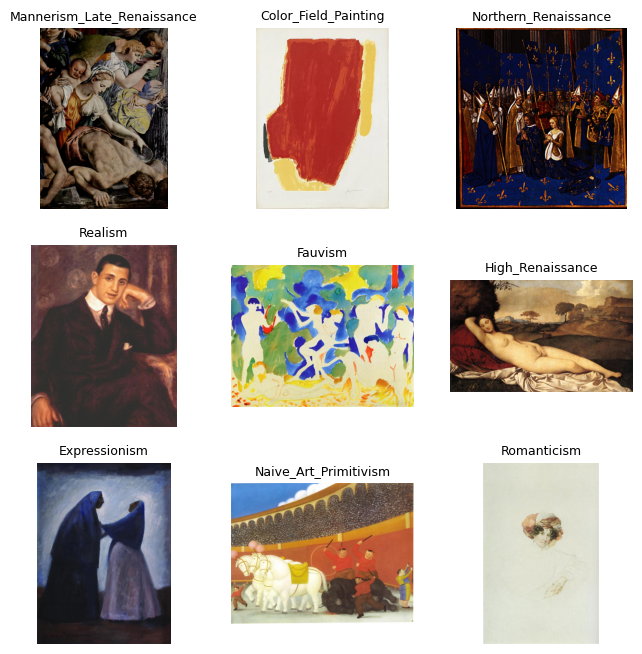

In [77]:
dataset_module.visualize_data(df) 

#### 2.2 : Visualisation de style spécifique

On étudie ensuite la variabilité intra style et inter style : à quel point les oeuvres représentant un certain style peuvent être différentes, et à quel point les oeuvre entre les différents styles diffèrent également.

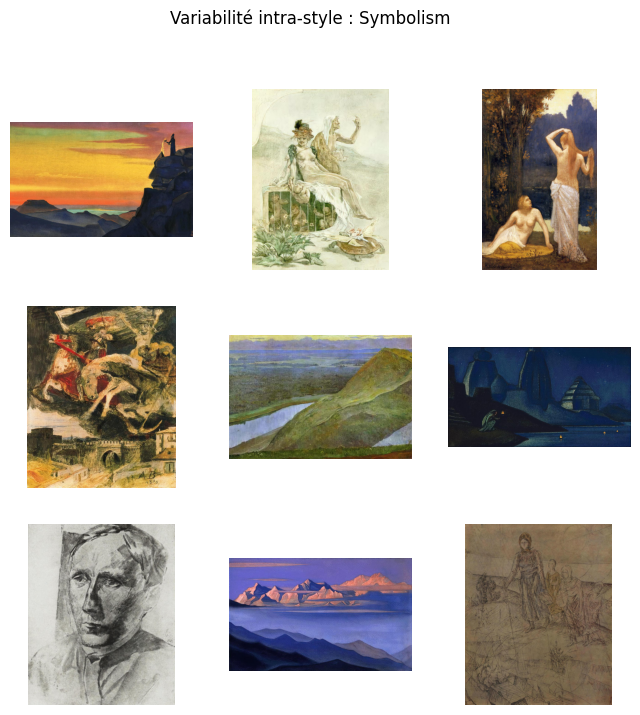

In [78]:
dataset_module.variability_inter_style("Symbolism", df, 9) 

Un même style artistique peut présenter une grande diversité de sujets, de couleurs et de compositions, rendant la classification visuelle non triviale.

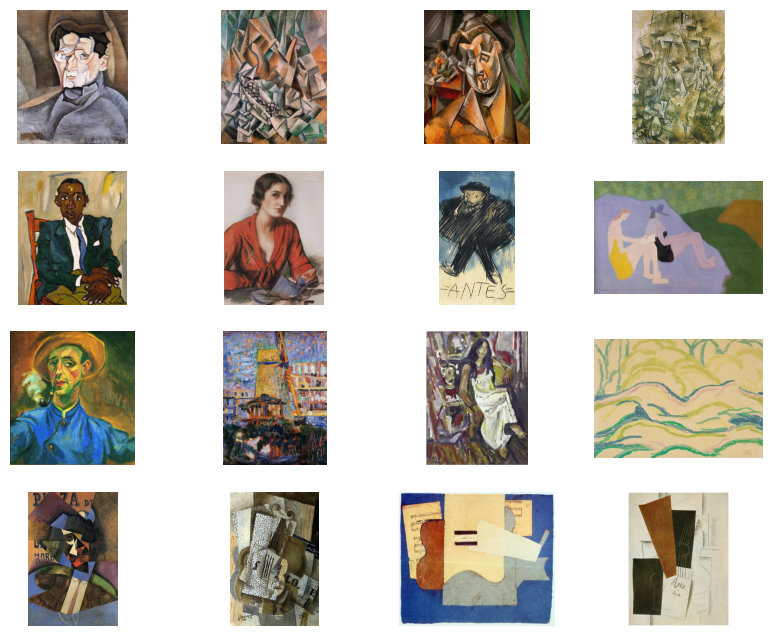

In [79]:
dataset_module.variation_inter_style(df)

### PART3 : Equilibre du dataset

#### 3.1 : Répartition des styles 

On observe la répartition des styles : 

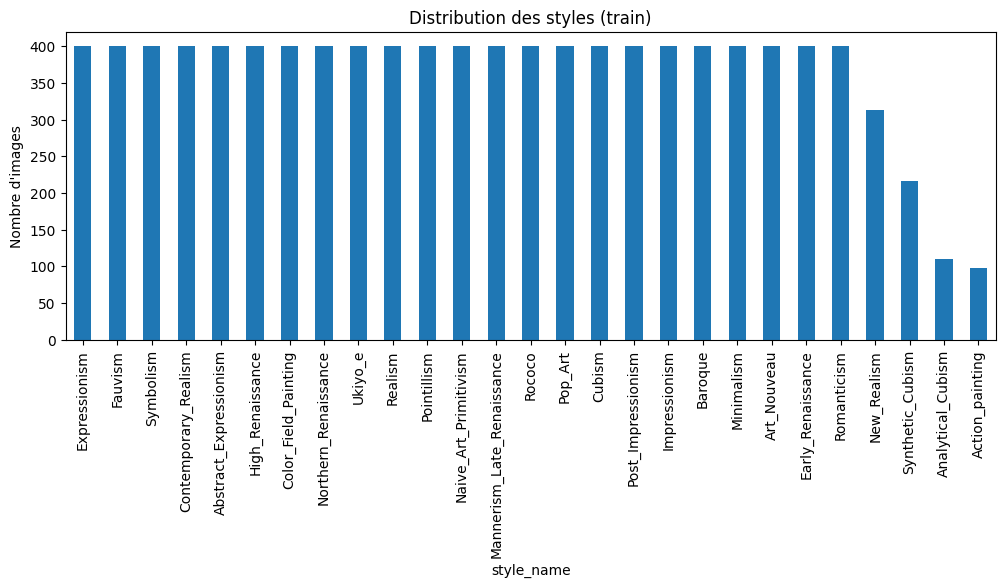

In [80]:
dataset_module.visualize_style_repartition(df)

On remarque que la plupart des styles ont le nombre maximum d'image choisi pour le sous dataset crée : 400. Quatre styles font exception : new_realism, synthetic_cubism, analytical_cubism et action_painting. Les styles fortement sous-représentés ont été retirés afin d’éviter un déséquilibre de classes susceptible de biaiser l’apprentissage et les métriques d’évaluation.

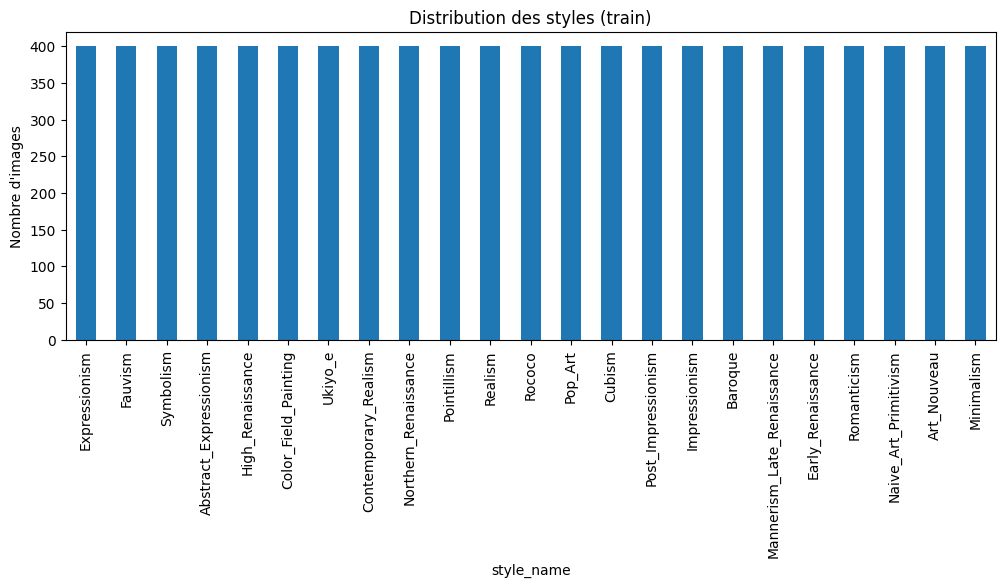

In [81]:
style_counts = df["style_name"].value_counts()
valid_styles = style_counts[style_counts >= 400].index

df = df[df["style_name"].isin(valid_styles)]
dataset_module.visualize_style_repartition(df)

#### 3.2 : Répartition des genres

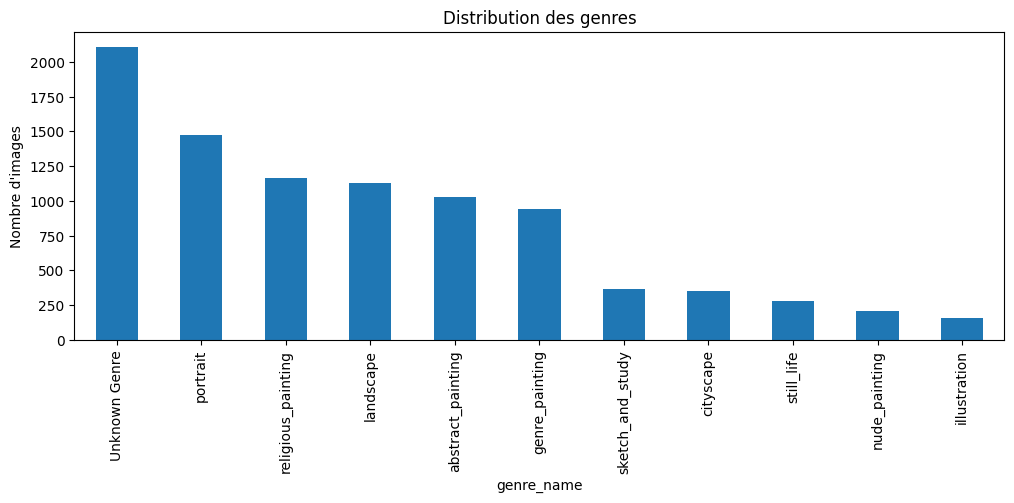

In [82]:
dataset_module.visualize_genre_repartition(df, number_of_genre=20)

Pour avoir une meilleure visualisation, on observe sans les genres inconnus :

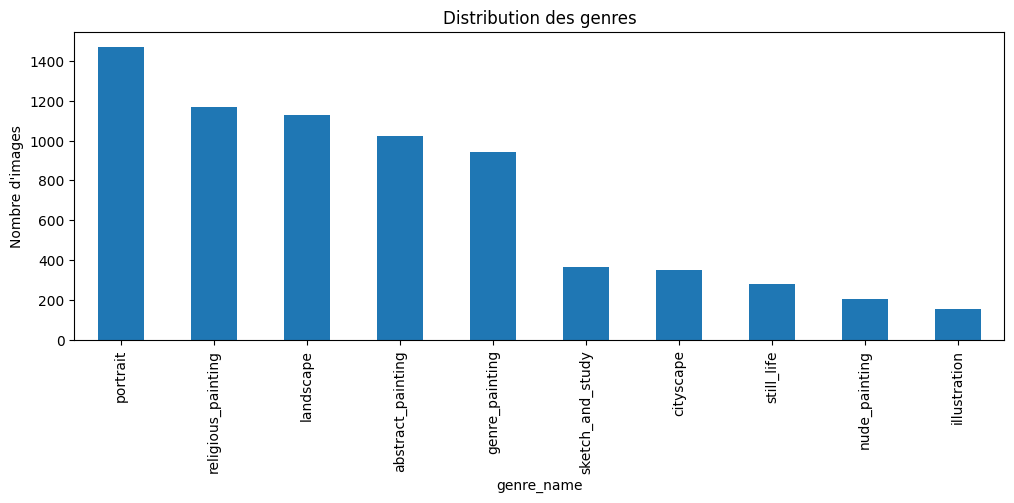

In [83]:
df_known_genre = df[df["genre_name"].str.lower() != "unknown genre"]
dataset_module.visualize_genre_repartition(df_known_genre, number_of_genre=20)

Une proportion importante des œuvres ne possède pas d’annotation de genre fiable, ce qui limite l’utilisation de cette variable comme signal auxiliaire supervisé.

#### 3.3 : Répartition des artistes 

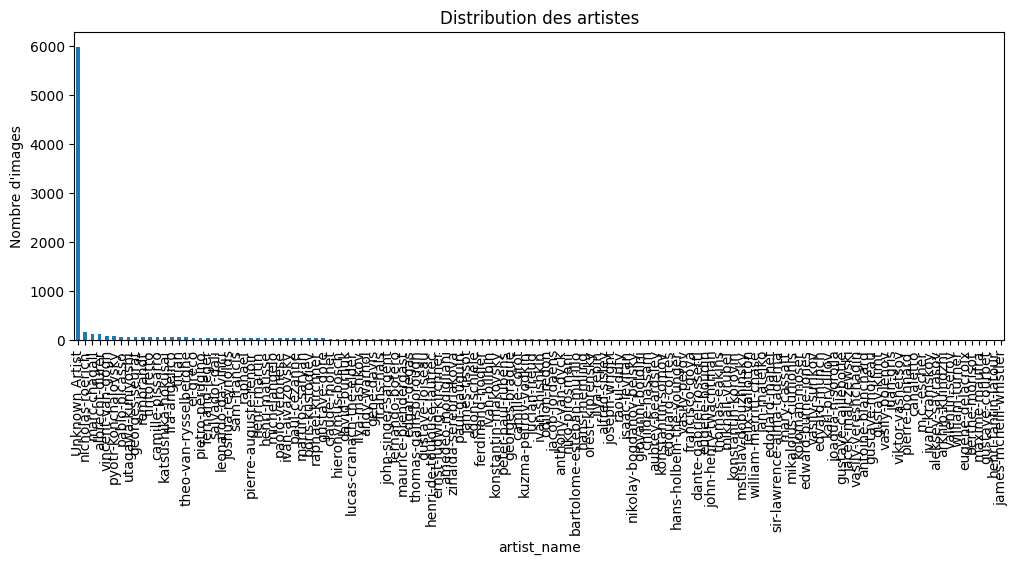

In [84]:
dataset_module.visualize_artist_repartition(df)

Difficile de voir quelque chose, il faudrait voir le même histogramme sans "Unknown Artist". Cela nous permet tout de même de remarquer la présence écrasante d'artiste inconnus.

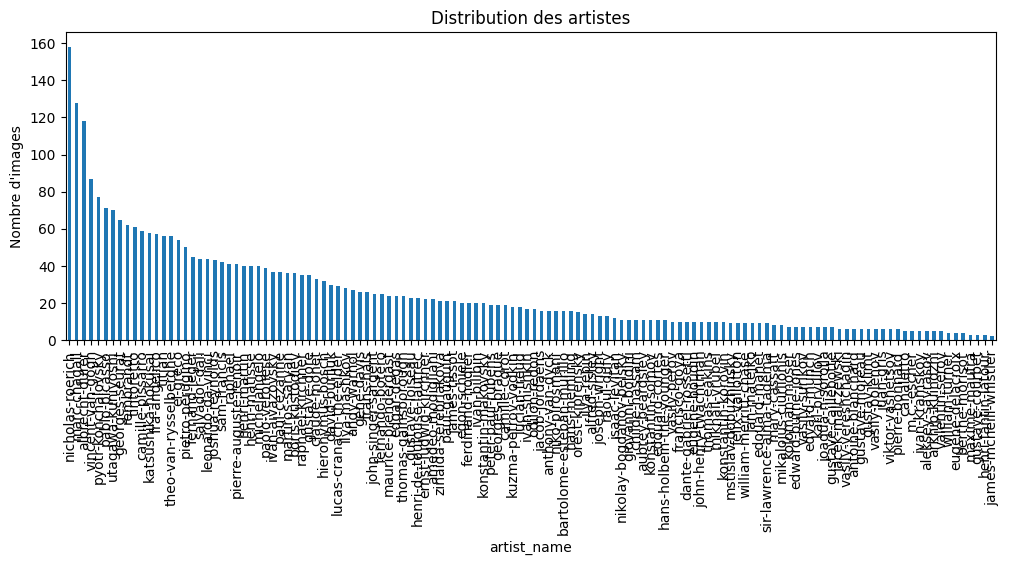

In [85]:
df_known_artist = df[df["artist_name"].str.lower() != "unknown artist"]

dataset_module.visualize_artist_repartition(df_known_artist)

L’information artiste est principalement exploitée à des fins d’analyse descriptive, mais n’est pas utilisée comme variable cible ou auxiliaire en raison de la forte proportion d’annotations manquantes.

### PART 4 : Exploration des liens entre artistes, genre et style

#### 4.1 : Les artistes dans le Dataset

On analyse différentes informations sur les artistes du dataset. On commence par compter le nombre d'artistes différents par styles : 

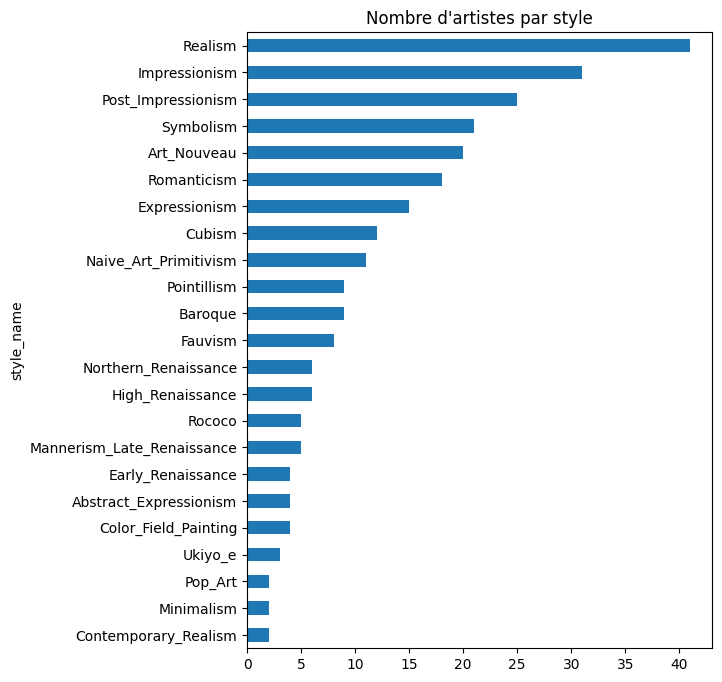

In [86]:
dataset_module.count_nb_artist_per_style(df)

On observe ensuite les styles dominés par quelques artistes, afin de voir si c'est une information discriminate ou qui pourrait nuire à la généralisation de notre modèle.

In [87]:
df_known_artist.groupby(["style_name", "artist_name"]).size() \
    .groupby("style_name").max().sort_values(ascending=False)



style_name
Northern_Renaissance          118
Naive_Art_Primitivism         109
Symbolism                     103
Ukiyo_e                        70
Baroque                        62
Mannerism_Late_Renaissance     61
Pointillism                    59
Early_Renaissance              57
Post_Impressionism             55
Art_Nouveau                    50
Rococo                         43
High_Renaissance               41
Impressionism                  39
Cubism                         39
Romanticism                    37
Realism                        32
Pop_Art                        27
Fauvism                        26
Abstract_Expressionism         25
Color_Field_Painting           24
Expressionism                  22
Contemporary_Realism            8
Minimalism                      2
dtype: int64

Certains styles sont dominés par un petit nombre d’artistes, ce qui peut conduire le modèle à apprendre des signatures individuelles plutôt que des caractéristiques stylistiques générales.
Cela justifierait de faire de la data augmentation et c'est à prendre en compte dans l'évaluation du modèle.

On observe également la repartition des styles en fonction de l'artiste : 

In [88]:
pd.crosstab(df["style_name"], df["artist_name"], normalize="index")

artist_name,Unknown Artist,albrecht-durer,aleksey-savrasov,alfred-sisley,amedeo-modigliani,andy-warhol,anthony-van-dyck,antoine-blanchard,arkhip-kuindzhi,aubrey-beardsley,...,valentin-serov,vasily-perov,vasily-polenov,vasily-surikov,vasily-vereshchagin,viktor-vasnetsov,vincent-van-gogh,william-merritt-chase,william-turner,zinaida-serebriakova
style_name,,,,,,,,,,,,,,,,,,,,,
Abstract_Expressionism,0.9250,0.000,0.0000,0.000,0.000,0.0000,0.00,0.000,0.0000,0.0000,...,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0000
Art_Nouveau,0.4750,0.000,0.0000,0.000,0.000,0.0000,0.00,0.000,0.0000,0.0275,...,0.0025,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0200
Baroque,0.6000,0.000,0.0000,0.000,0.000,0.0000,0.04,0.000,0.0000,0.0000,...,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0000
Color_Field_Painting,0.8950,0.000,0.0000,0.000,0.000,0.0000,0.00,0.000,0.0000,0.0000,...,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0000
Contemporary_Realism,0.9800,0.000,0.0000,0.000,0.000,0.0000,0.00,0.000,0.0000,0.0000,...,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0000
Cubism,0.6550,0.000,0.0000,0.000,0.000,0.0000,0.00,0.000,0.0000,0.0000,...,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0000
Early_Renaissance,0.7950,0.000,0.0000,0.000,0.000,0.0000,0.00,0.000,0.0000,0.0000,...,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0000
Expressionism,0.6725,0.000,0.0000,0.000,0.055,0.0000,0.00,0.000,0.0000,0.0000,...,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0250
Fauvism,0.8300,0.000,0.0000,0.000,0.000,0.0000,0.00,0.000,0.0000,0.0000,...,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0000


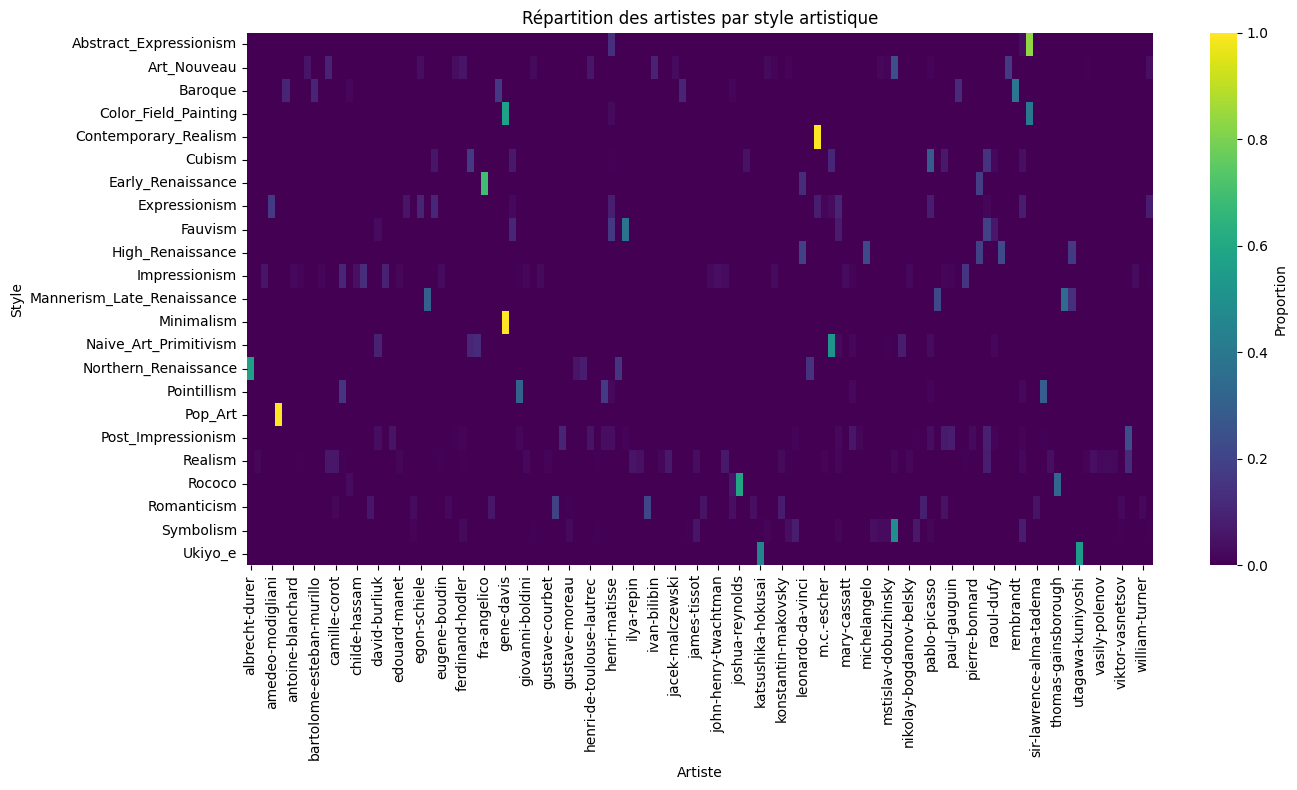

In [89]:
dataset_module.repartition_artist_per_style(df_known_artist)

On observe également spécifiquement pour val et test afin de voir si cela peut poser problème : 

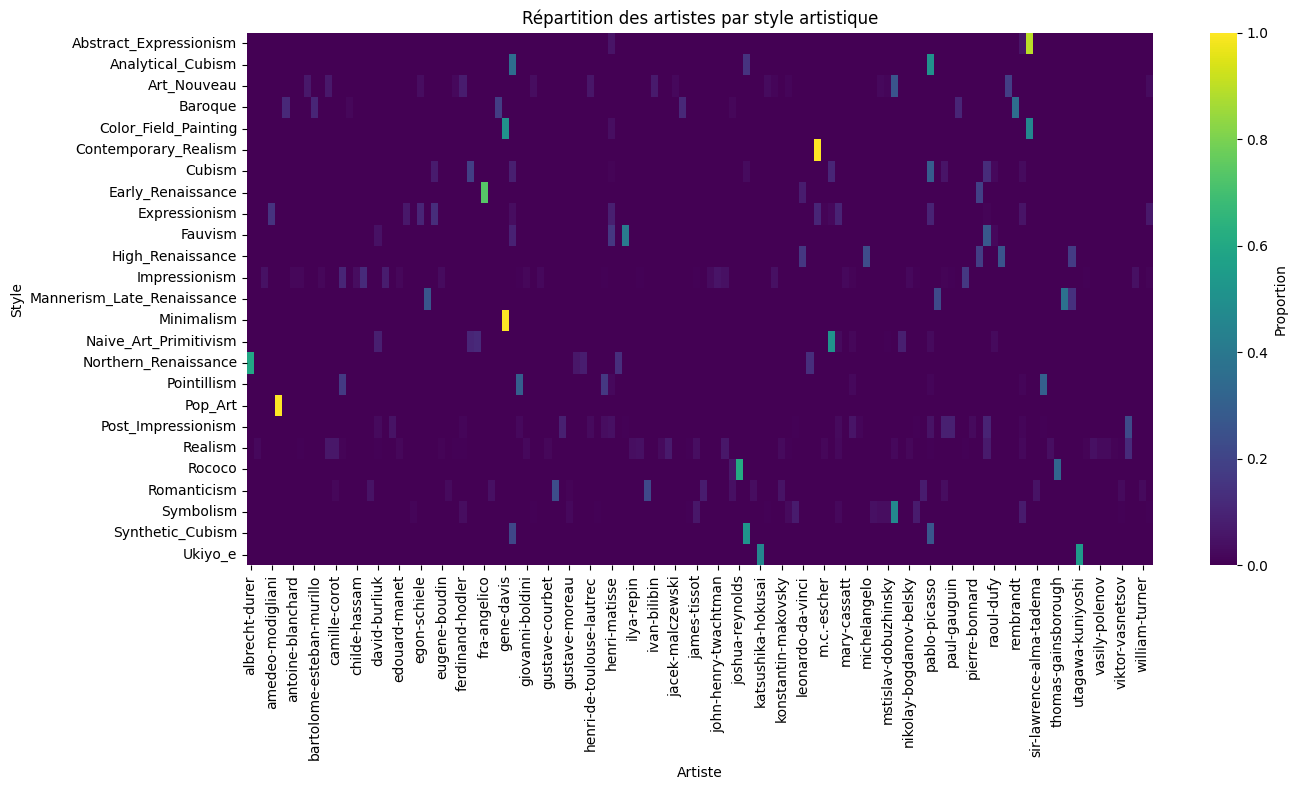

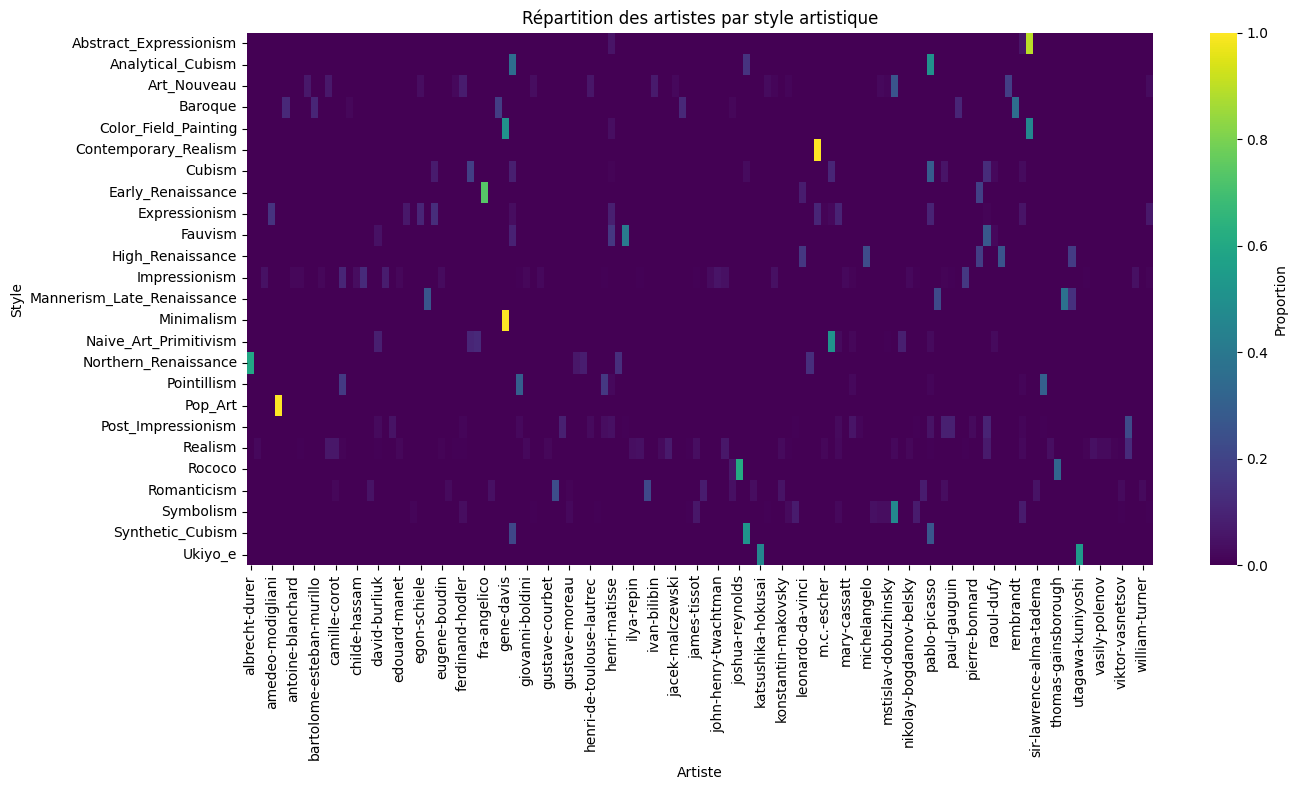

In [100]:
df_test_known_artist_ = df_train[df_train["artist_name"].str.lower() != "unknown artist"]
df_val_known_artist_ = df_train[df_train["artist_name"].str.lower() != "unknown artist"]

dataset_module.repartition_artist_per_style(df_test_known_artist_)
dataset_module.repartition_artist_per_style(df_val_known_artist_)


C'est la même chose apparemment...

Et enfin on observe le taux d'artistes inconnus pour les oeuvres par styles :

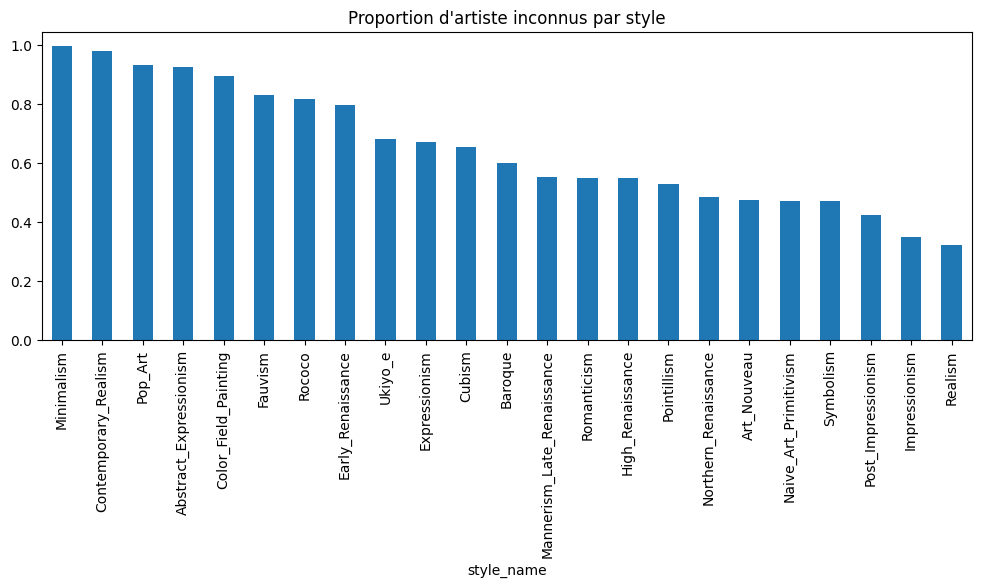

In [90]:
dataset_module.unknown_artist_per_style(df)

#### 4.2 : Les genres dans le Dataset

On compte le nombre de genre différents pour chaque styles :

In [ ]:
dataset_module.count_nb_genre_per_style(df)

On observe la répartition des styles en fonction du genre :

In [91]:
pd.crosstab(df["style_name"], df["genre_name"], normalize="index")

genre_name,Unknown Genre,abstract_painting,cityscape,genre_painting,illustration,landscape,nude_painting,portrait,religious_painting,sketch_and_study,still_life
style_name,,,,,,,,,,,
Abstract_Expressionism,0.1525,0.8275,0.0000,0.0000,0.0025,0.0000,0.0075,0.0025,0.0025,0.0050,0.0000
Art_Nouveau,0.3525,0.0000,0.0550,0.1725,0.1375,0.0675,0.0225,0.1350,0.0250,0.0300,0.0025
Baroque,0.2200,0.0000,0.0100,0.1775,0.0000,0.0350,0.0150,0.2425,0.2275,0.0450,0.0275
Color_Field_Painting,0.0425,0.9575,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Contemporary_Realism,0.2025,0.0000,0.0175,0.1150,0.0000,0.3575,0.1150,0.1350,0.0000,0.0025,0.0550
Cubism,0.2325,0.0625,0.0525,0.1075,0.0025,0.1100,0.0500,0.1575,0.0050,0.0450,0.1750
Early_Renaissance,0.0475,0.0000,0.0000,0.0125,0.0100,0.0000,0.0000,0.0875,0.7775,0.0650,0.0000
Expressionism,0.2500,0.0150,0.0425,0.1725,0.0275,0.0900,0.0550,0.2650,0.0050,0.0375,0.0400
Fauvism,0.3900,0.0000,0.0575,0.0575,0.0025,0.2075,0.0350,0.1150,0.0000,0.0125,0.1225


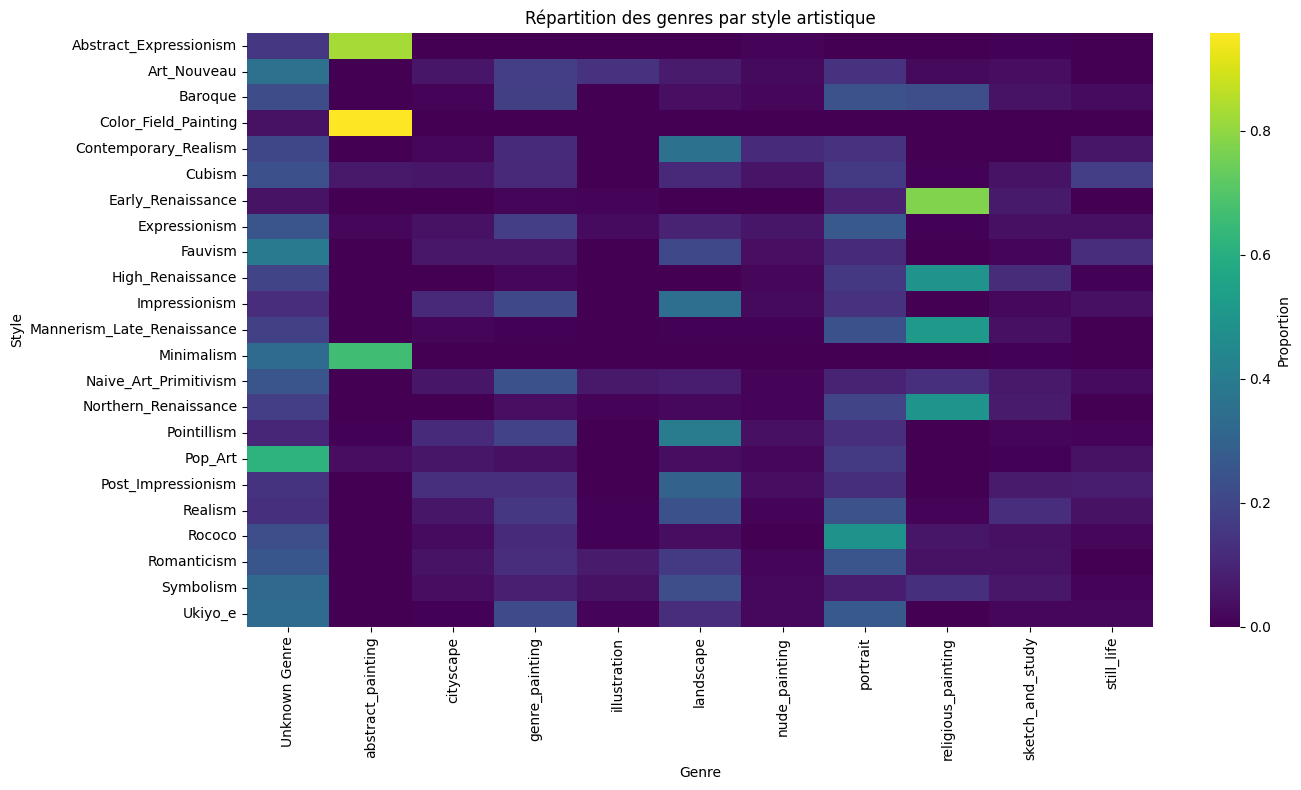

In [92]:
dataset_module.repartition_genre_per_style(df)

On observe aussi le taux de genre inconnu par style : 

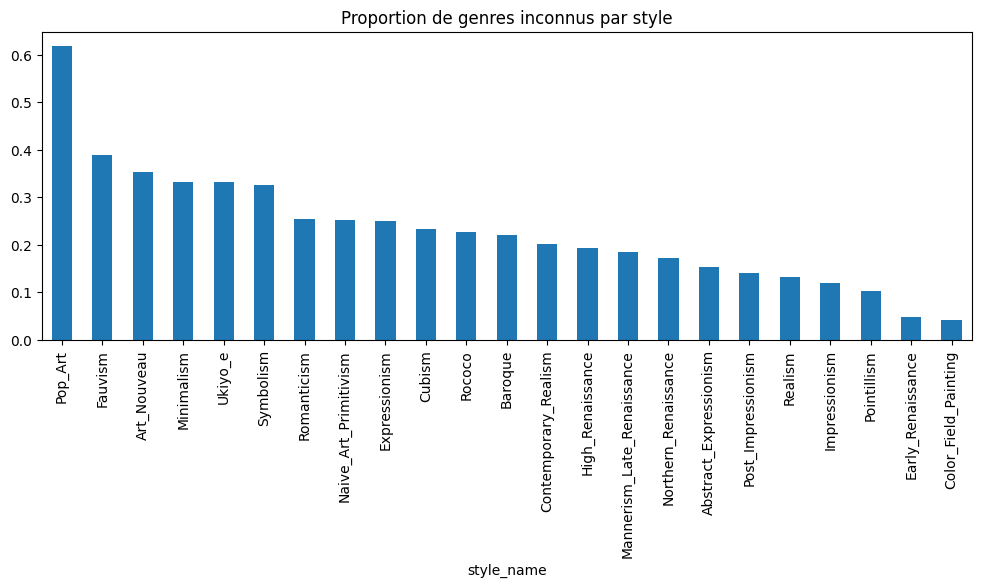

In [93]:
dataset_module.unknown_genre_per_style(df)

C'est intéressant de voir que pour certains style on a quasiment un seul genre spécifique. Pour certains styles on a aussi quasiment aucun genre inconnu. Ainsi on peut pour certains styles s'appuyer fortement sur le genre pour prédire le style de l'oeuvre.

### PART 5 : Similarité entre les styles

On compare deux styles en fonction de leur similarité dans les genre afin de voir s'ils sont structurellement proches : une distance faible signifie des styles très similaires en termes de genres et une distance élevée des styles structurellement différents

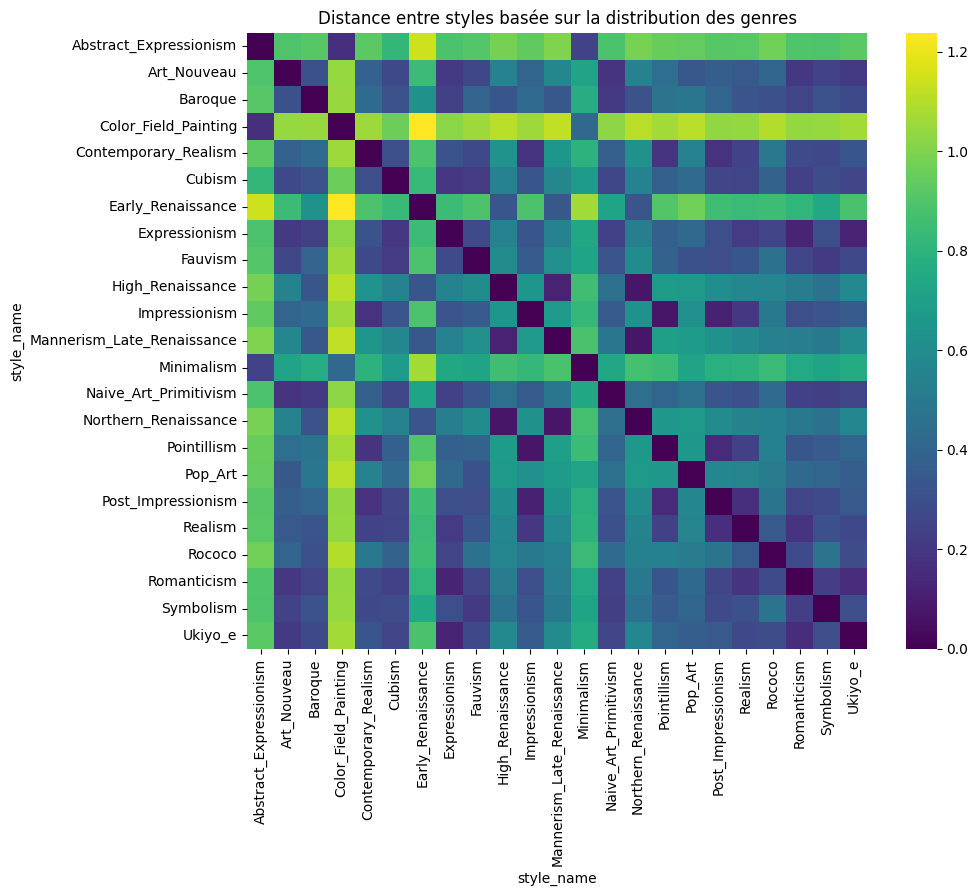

In [94]:
dataset_module.similarities_between_style_based_on_genre(df)

On remarque que certains styles sont singuliers et ne s'apparentent à (quasi) aucun autre en terme de genre : c'est le cas de l'expressionisme abstrait, ou du color field painting par exemple. 

On analyse ensuite la création de cluster de style, pour voir si certains se ressemblent, ce qui pourrait nous aider a voir quelles erreur peuvent être fréquentes: 

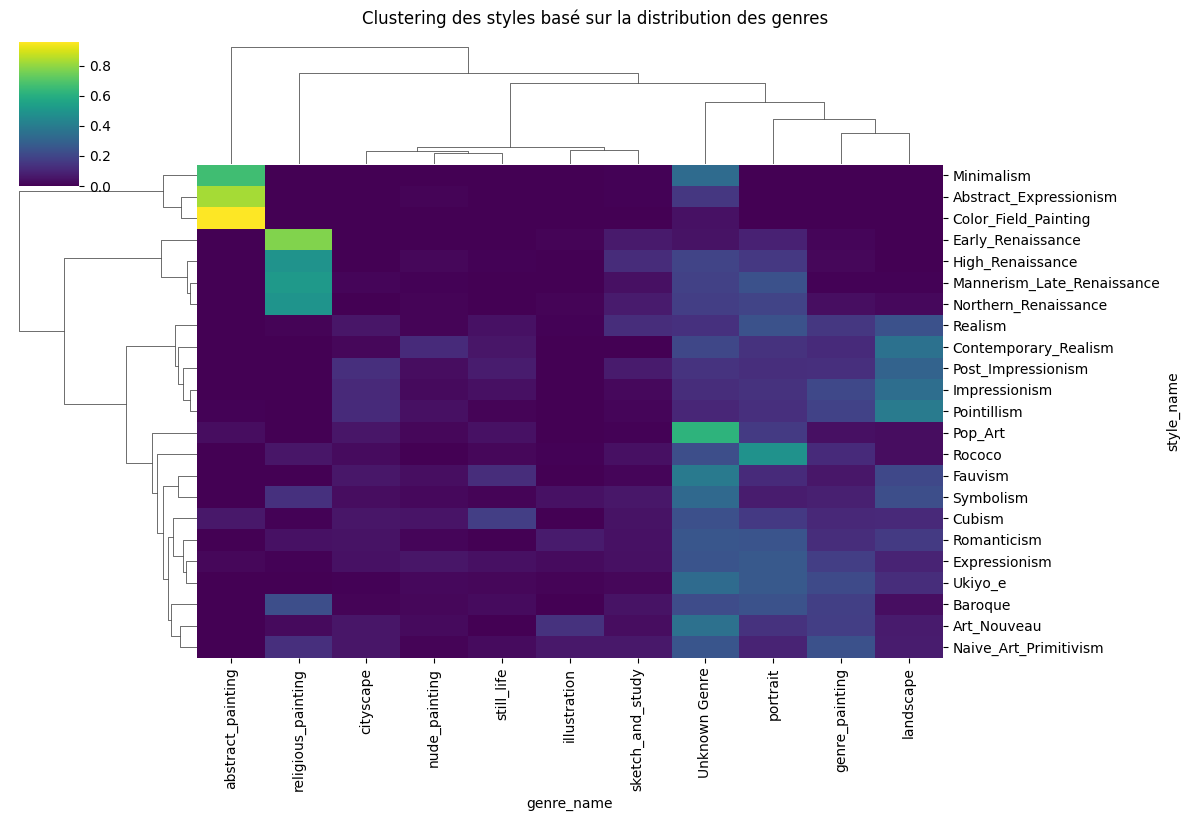

In [95]:
dataset_module.styles_cluster_based_on_genre(df)

### EXTRA : Répartition des artistes dans les 3 dataset et anomalies :

In [101]:
# Listes d'artistes par split
train_artists = set(df_train["artist_name"])
val_artists = set(df_val["artist_name"])
test_artists = set(df_test["artist_name"])

# Artistes présents dans train ET test
overlap_train_test = train_artists & test_artists
overlap_train_val  = train_artists & val_artists
overlap_val_test   = val_artists & test_artists

print("Artistes communs train-test:", len(overlap_train_test))
print("Artistes communs train-val:", len(overlap_train_val))
print("Artistes communs val-test:", len(overlap_val_test))


Artistes communs train-test: 109
Artistes communs train-val: 110
Artistes communs val-test: 95


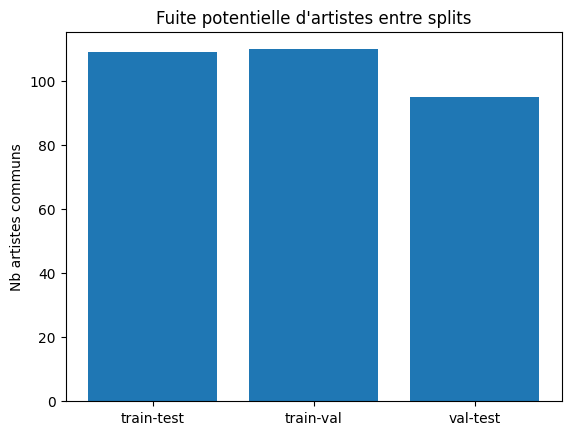

In [102]:
import matplotlib.pyplot as plt

overlaps = [len(overlap_train_test), len(overlap_train_val), len(overlap_val_test)]
labels = ["train-test", "train-val", "val-test"]

plt.bar(labels, overlaps)
plt.ylabel("Nb artistes communs")
plt.title("Fuite potentielle d'artistes entre splits")
plt.show()


Il y a beaucoup d'artistes communs entre les trois dataset et cela peut poser problème : notre modèle pourrait mémoriser les artistes plutot que les styles et donc avoir des soucis de généralisation. Il va donc falloir faire des splits selon les artistes, tout en gardant pour train des classes équilibrées.

In [ ]:
#TODO split artistes

### Anomalies du Dataset

Certaines catégories visuelles (ex. architecture ou sculpture) peuvent apparaître dans des styles picturaux, mais ne sont pas explicitement annotées, ce qui limite l’analyse sémantique fine du contenu.
On vérifie si c'est le cas ou non : 

In [96]:
#TODO